In [24]:
import os
import pathlib
import sys
from typing import List

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [25]:
df=pd.read_csv('data\student-data.csv')


### Introduction to the dataset 




*** BASIC INFORMATION ***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-nu

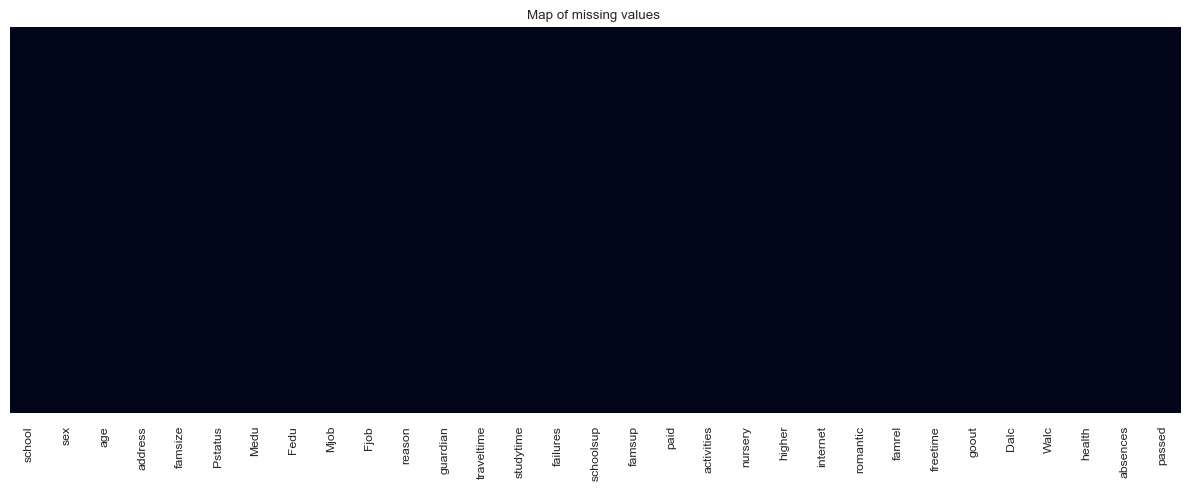

There are no missing values


In [26]:
from visualizations import na_visualization 


print("\n*** BASIC INFORMATION ***\n")
print(df.info())
print("\nShape        :", df.shape)
print("\nNumeric cols :", df.select_dtypes("number").columns.tolist())
print("Categorical  :", df.select_dtypes("object").columns.tolist())
    
print("\nClass distribution (passed):\n", df["passed"].value_counts(normalize=True).rename("passed proportion"))
na_visualization(df)


### Train/Test Split 

In [27]:
X = df.drop(columns=["passed"])
y = df["passed"]

numeric_cols = X.select_dtypes("number").columns.tolist()
categorical_cols = X.select_dtypes("object").columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("\nSize of Train set      :", X_train.shape)
print("Size of Test set       :", X_test.shape)


Size of Train set      : (316, 30)
Size of Test set       : (79, 30)


Cosas a mencionar  : 

No hay imputacion debido a que no hay ningun NA ni valor faltante

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
140,-1.305332,1.135587,0.462701,0.722867,2.386735,-0.442589,-2.091898,-1.272747,-1.038594,-0.554434,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
245,-0.524111,-0.667656,-1.388103,2.115708,-1.262660,-0.442589,0.093357,-0.269784,-0.136957,-0.554434,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
131,-1.305332,-1.569278,-1.388103,2.115708,-1.262660,-0.442589,0.093357,-0.269784,-0.136957,-0.554434,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
153,1.819554,0.233965,-0.462701,-0.669974,-1.262660,3.553358,0.093357,1.736141,0.764679,-0.554434,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
386,1.038332,1.135587,1.388103,2.115708,-1.262660,-0.442589,0.093357,0.733178,-0.136957,0.513866,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
50,-0.524111,-0.667656,-0.462701,2.115708,-0.046195,-0.442589,0.093357,-0.269784,-0.136957,0.513866,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
290,1.038332,1.135587,-0.462701,-0.669974,-0.046195,-0.442589,0.093357,-0.269784,-1.038594,-0.554434,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
279,1.038332,1.135587,0.462701,0.722867,-1.262660,-0.442589,0.093357,-1.272747,-0.136957,-0.554434,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
98,-0.524111,1.135587,1.388103,-0.669974,-1.262660,-0.442589,1.185985,-0.269784,0.764679,-0.554434,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
14,-1.305332,-0.667656,-0.462701,-0.669974,1.170270,-0.442589,0.093357,1.736141,-1.038594,-0.554434,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0



Tabla de correlaciones:
                    age  Medu  Fedu  traveltime  studytime  failures  famrel  \
age                1.00 -0.17 -0.18        0.08      -0.05      0.25    0.05   
Medu              -0.17  1.00  0.62       -0.20       0.05     -0.23    0.01   
Fedu              -0.18  0.62  1.00       -0.20      -0.02     -0.26    0.01   
traveltime         0.08 -0.20 -0.20        1.00      -0.06      0.06   -0.03   
studytime         -0.05  0.05 -0.02       -0.06       1.00     -0.19    0.02   
failures           0.25 -0.23 -0.26        0.06      -0.19      1.00   -0.04   
famrel             0.05  0.01  0.01       -0.03       0.02     -0.04    1.00   
freetime           0.07  0.05  0.01       -0.06      -0.14      0.12    0.17   
goout              0.12  0.07  0.03       -0.00      -0.10      0.16    0.07   
Dalc               0.16  0.03  0.02        0.14      -0.19      0.13   -0.07   
Walc               0.16 -0.04 -0.03        0.10      -0.26      0.15   -0.10   
health         

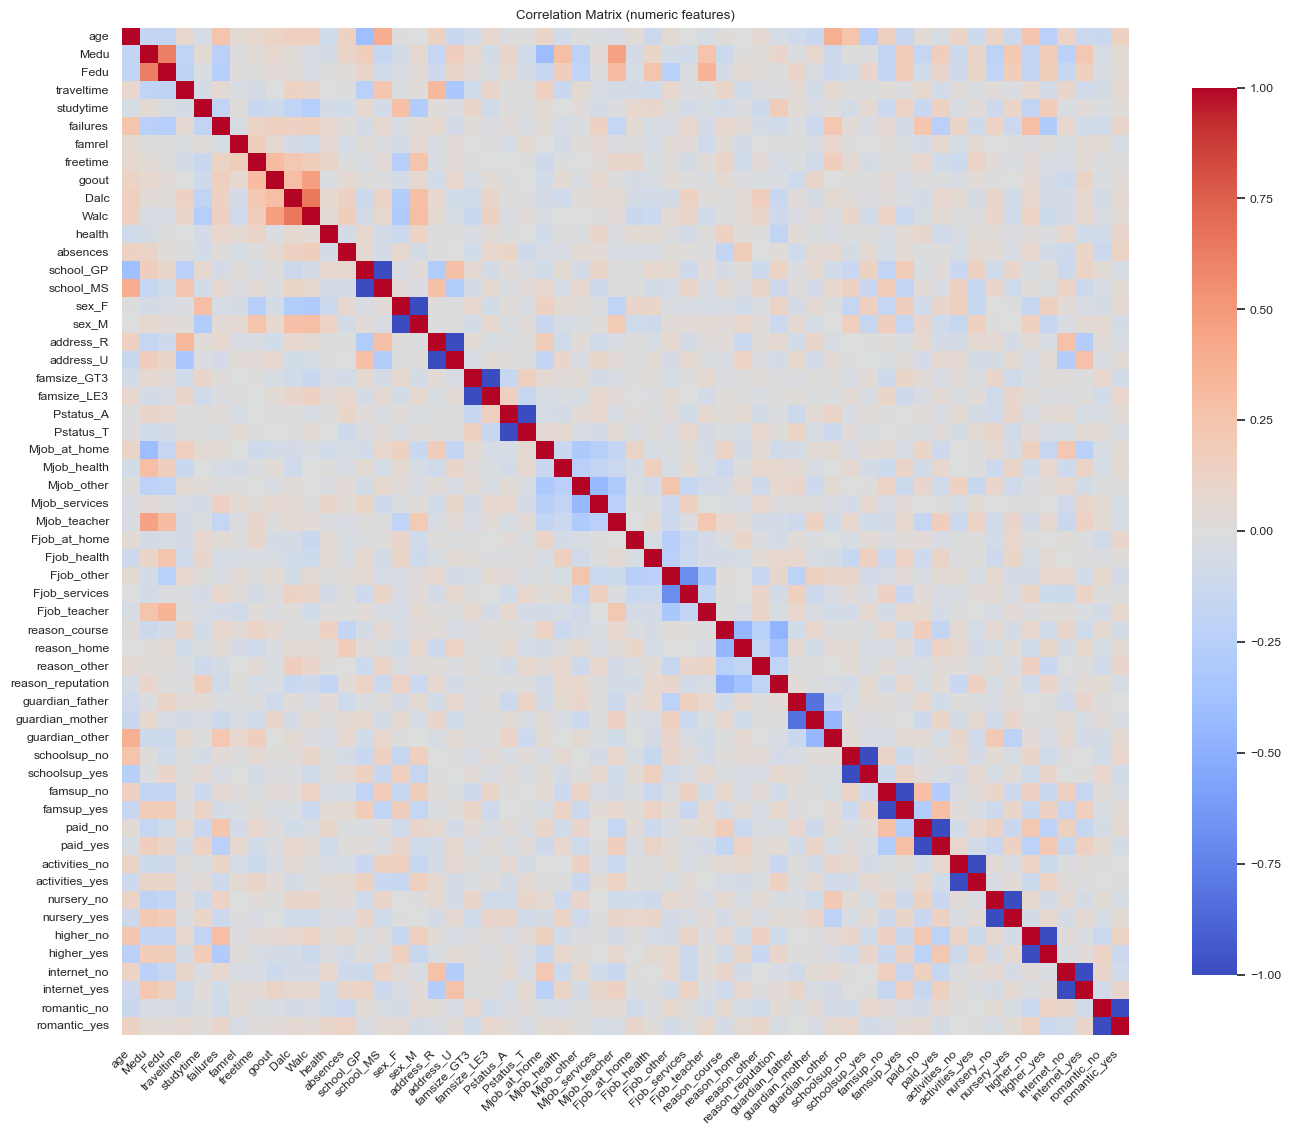

In [28]:
from utils import detect_outliers_iqr
from importlib import reload 
from visualizations import correlation_heatmap
import visualizations
reload (visualizations)

num_cols = X_train.select_dtypes("number").columns.tolist()
cat_cols = X_train.select_dtypes("object").columns.tolist()

# Creating transformers for each type
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')


# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numeric_cols),
        ('cat', cat_transformer, categorical_cols)
    ]
)

X_train_proc=preprocessor.fit_transform(X_train)
X_test_proc=preprocessor.transform(X_test) 

all_feature_names = list(num_cols) + preprocessor.named_transformers_["cat"].get_feature_names_out(cat_cols).tolist()


X_train = pd.DataFrame(X_train_proc, columns=all_feature_names, index=X_train.index)
X_test  = pd.DataFrame(X_test_proc , columns=all_feature_names, index=X_test.index)

display(X_train.head(10))

X_train.to_csv('info.csv')


correlation_heatmap(X_train)


| #  |  Par de variables                                                 |  ρ (Pearson) |  ¿Por qué resulta interesante?\*                                                                                                                                                                    |
| -- | ----------------------------------------------------------------- | ------------ | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
|  1 | **Dalc ↔ Walc** (consumo de alcohol entre semana ↔ fin de semana) | **0,65**     | Confirma que el hábito de beber no se restringe a un solo contexto; quienes beben entre semana también tienden a hacerlo con más fuerza los fines de semana. Puede discutirse como señal de riesgo. |
|  2 | **Medu ↔ Fedu** (nivel educativo de la madre ↔ del padre)         | **0,62**     | Muestra fuerte homofilia educacional en la pareja parental; relevante para reflexionar sobre entornos con capital cultural similar y su efecto en el rendimiento.                                   |
|  3 | **goout ↔ Walc** (salir con amigos ↔ alcohol fin de semana)       | **0,47**     | Sugiere que la vida social activa se asocia a mayor consumo recreativo; combina una variable de tiempo libre con una de salud.                                                                      |
|  4 | **Medu ↔ Mjob\_teacher**                                          | **0,45**     | Era esperable que las madres que son profesoras tengan estudios altos, pero cuantificarlo ayuda a justificar por qué “Mjob” puede ser un buen proxy de capital educativo.                           |
|  5 | **Medu ↔ Mjob\_at\_home**                                         | **‑0,41**    | Patrón opuesto al anterior: madres dedicadas al hogar suelen tener menor nivel educativo; contrasta claramente con el punto 4 y refuerza la interpretación.                                         |
|  6 | **age ↔ school\_MS** (edad ↔ colegio Mousinho da Silveira)        | **0,39**     | Indica que el alumnado de MS es ligeramente mayor que el de GP (correlación negativa simétrica con `school_GP`). Puede insinuar políticas de repetición o admisiones tardías.                       |
|  7 | **age ↔ guardian\_other**                                         | **0,39**     | Estudiantes mayores reportan más frecuentemente tutores distintos de madre/padre (p.ej. ellos mismos, abuelos); abre la puerta a hablar de autonomía o situaciones familiares especiales.           |
|  8 | **Fedu ↔ Fjob\_teacher**                                          | **0,35**     | Igual que en las madres, refuerza coherencia interna del dataset y ayuda a validar variables de profesión/educación paternal.                                                                       |


## Feature Engineering 

| Nº | *Feature*                    | Cómo se construye (pseudo‑código)        | Razonamiento clave                                                                    |
| -- | ---------------------------- | ---------------------------------------- | ------------------------------------------------------------------------------------- |
| 1  | **`study_efficiency_log`**   | `log(studytime + 1) − log(absences + 1)` | Relación horas de estudio / ausencias con escala logarítmica para domar los outliers. |
| 2  | **`absence_ratio`**          | `absences / (traveltime + 1)`            | Penaliza más las faltas de quienes viven cerca de la escuela.                         |
| 3  | **`absence_flag_q75`**       | `1 si absences > P75(absences)`          | Marca a los alumnos con ausencias inusualmente altas tras la limpieza.                |
| 4  | **`alcohol_index_z`**        | `0.4·z(Dalc) + 0.6·z(Walc)`              | Indicador de consumo de alcohol con pesos y escalado *z‑score*.                       |
| 5  | **`alcohol_spike_weekend`**  | `Walc − Dalc`                            | Detecta picos de ocio que pueden interferir con el estudio.                           |
| 6  | **`weekend_focus`**          | `1 si (Dalc ≤ 2 ∧ Walc ≤ 2)`             | Bandera de “buen manejo” del fin de semana.                                           |
| 7  | **`family_support_total`**   | `schoolsup_yes + famsup_yes + paid_yes`  | Suma de apoyos académicos formales e informales (0‑3).                                |
| 8  | **`support_change`**         | `schoolsup_yes − famsup_yes`             | Diferencia ayuda escuela vs. familia: revela discrepancias.                           |
| 9  | **`parent_edu_avg`**         | `(Medu + Fedu) / 2`                      | Capital educativo familiar medio.                                                     |
| 10 | **`highly_educated_parent`** | `1 si max(Medu,Fedu) ≥ 3`                | Basta que un progenitor tenga ≥ secundaria para influir positivamente.                |
| 11 | **`commute_spline_low`**     | `max(0, 2 − traveltime)`                 | Primer segmento del *spline* para capturar efecto no lineal (viajes cortos).          |
| 12 | **`commute_spline_high`**    | `max(0, traveltime − 2)`                 | Segundo segmento del *spline* (viajes largos ≥ 30 min).                               |
| 13 | **`failure_history_std`**    | `z(failures)`                            | Suspensos pasados en escala estándar.                                                 |
| 14 | **`failure_history_sq`**     | `failure_history_std²`                   | Efecto no lineal: el primer suspenso suele pesar más que los siguientes.              |
| 15 | **`fairness_sex_schoolsup`** | `sex_F × schoolsup_yes`                  | Interacción para vigilar posibles sesgos de género en el soporte escolar.             |
| 16 | **`fairness_sex_famsup`**    | `sex_F × famsup_yes`                     | Interacción equivalente con apoyo familiar.                                           |


In [29]:
import utils
reload(utils)
from utils import build_features


train_stats = {
    "q75_absences": X_train["absences"].quantile(0.75),
    "mean_dalc": X_train["Dalc"].mean(),
    "std_dalc": X_train["Dalc"].std(ddof=0) or 1,
    "mean_walc": X_train["Walc"].mean(),
    "std_walc": X_train["Walc"].std(ddof=0) or 1,
    "mean_failures": X_train["failures"].mean(),
    "std_failures": X_train["failures"].std(ddof=0) or 1,
    "median_studytime": X_train["studytime"].median(),
    "median_absences": X_train["absences"].median(),
    "median_traveltime": X_train["traveltime"].median(),
}


X_train_fe = build_features(X_train, train_stats)
X_test_fe = build_features(X_test, train_stats)




140    2.386881
245    0.000000
131    0.000000
153    0.000000
386    0.000000
         ...   
29    -0.880667
181    0.532494
252    0.000000
300   -0.766277
350   -0.314402
Name: study_efficiency_log, Length: 316, dtype: float64
305   -0.314402
225   -0.880667
237    0.000000
318    1.941866
182    1.119719
         ...   
84     0.532494
354    0.164986
259    2.386881
346    0.416800
133    0.000000
Name: study_efficiency_log, Length: 79, dtype: float64


c:\Users\alfre\Desktop\clase\Elements of Artificial Inteligence\Project-2\student-intervention-ml-pipeline\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\alfre\Desktop\clase\Elements of Artificial Inteligence\Project-2\student-intervention-ml-pipeline\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
